In [253]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [254]:
df=pd.read_csv('Prostate_Cancer.csv')
df

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059
...,...,...,...,...,...,...,...,...,...,...
95,96,M,23,16,132,1264,0.091,0.131,0.210,0.056
96,97,B,22,14,78,451,0.105,0.071,0.190,0.066
97,98,B,19,27,62,295,0.102,0.053,0.135,0.069
98,99,B,21,24,74,413,0.090,0.075,0.162,0.066


In [255]:
df
df.columns

Index(['id', 'diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension'],
      dtype='object')

In [256]:
df.info()

df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


,count,mean,std,min,25%,50%,75%,max
id,100.0,50.50000,29.011492,1.000,25.7500,50.5000,75.250,100.000
radius,100.0,16.85000,4.879094,9.000,12.0000,17.0000,21.000,25.000
texture,100.0,18.23000,5.192954,11.000,14.0000,17.5000,22.250,27.000
perimeter,100.0,96.78000,23.676089,52.000,82.5000,94.0000,114.250,172.000
area,100.0,702.88000,319.710895,202.000,476.7500,644.0000,917.000,1878.000
smoothness,100.0,0.10273,0.014642,0.070,0.0935,0.1020,0.112,0.143
compactness,100.0,0.12670,0.061144,0.038,0.0805,0.1185,0.157,0.345
symmetry,100.0,0.19317,0.030785,0.135,0.1720,0.1900,0.209,0.304
fractal_dimension,100.0,0.06469,0.008151,0.053,0.0590,0.0630,0.069,0.097


In [257]:

# Define the number of augmented samples you want to create
num_augmented_samples = 1000  # Adjust this as needed

# Initialize an empty DataFrame to store the augmented data
augmented_data = pd.DataFrame(columns=df.columns)

# Define the range for random data modification
# You can adjust these ranges as needed
radius_range = (-5, 5)
texture_range = (-5, 5)
perimeter_range = (-10, 10)
area_range = (-100, 100)
smoothness_range = (-0.02, 0.02)
compactness_range = (-0.02, 0.02)
symmetry_range = (-0.02, 0.02)
fractal_dimension_range = (-0.01, 0.01)

for _ in range(num_augmented_samples):
    # Randomly select an existing row to modify
    original_row = df.sample(1)

    # Create a new row with random modifications
    augmented_row = original_row.copy()
    augmented_row['radius'] += np.random.uniform(*radius_range)
    augmented_row['texture'] += np.random.uniform(*texture_range)
    augmented_row['perimeter'] += np.random.uniform(*perimeter_range)
    augmented_row['area'] += np.random.uniform(*area_range)
    augmented_row['smoothness'] += np.random.uniform(*smoothness_range)
    augmented_row['compactness'] += np.random.uniform(*compactness_range)
    augmented_row['symmetry'] += np.random.uniform(*symmetry_range)
    augmented_row['fractal_dimension'] += np.random.uniform(*fractal_dimension_range)

    # Append the augmented row to the new DataFrame
    augmented_data = pd.concat([augmented_data, augmented_row], ignore_index=True)

# Concatenate the original data and the augmented data
df = pd.concat([df, augmented_data], ignore_index=True)

df

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23.000000,12.000000,151.000000,954.000000,0.143000,0.278000,0.242000,0.079000
1,2,B,9.000000,13.000000,133.000000,1326.000000,0.143000,0.079000,0.181000,0.057000
2,3,M,21.000000,27.000000,130.000000,1203.000000,0.125000,0.160000,0.207000,0.060000
3,4,M,14.000000,16.000000,78.000000,386.000000,0.070000,0.284000,0.260000,0.097000
4,5,M,9.000000,19.000000,135.000000,1297.000000,0.141000,0.133000,0.181000,0.059000
...,...,...,...,...,...,...,...,...,...,...
1095,34,M,15.457361,21.389945,126.360140,1081.089417,0.078942,0.175550,0.167364,0.061605
1096,64,B,26.542947,20.687847,61.789319,263.586983,0.058663,0.085398,0.239482,0.061407
1097,22,B,13.390673,23.714616,56.289257,282.984079,0.121289,0.055590,0.178655,0.074626
1098,96,M,20.837509,20.246500,125.496669,1274.393825,0.079701,0.120431,0.210235,0.060597


In [258]:
df.shape



(1100, 10)

In [259]:
# for i in augmented_dataset.columns:
#     if i == 'diagnosis_result':
#         pass
#     else:
#         print(i)
#         data_min = augmented_dataset[i].describe().min()
#         data_max = augmented_dataset[i].describe().max()
#         print(f"Float numbers from {data_min} to {data_max}")



In [260]:
for col in df.columns:
    print(f"Unique values in column '{col}': {df[col].unique()}")

Unique values in column 'id': [1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99
 100]
Unique values in column 'diagnosis_result': ['M' 'B']
Unique values in column 'radius': [23.          9.         21.         ... 13.39067325 20.83750912
 22.53610647]
Unique values in column 'texture': [12.         13.         27.         ... 23.7146165  20.2465001
 15.13185078]
Unique values in column 'perimeter': [151.         133.         130.         ...  56.28925664 125.49666861
  61.00621826]
Unique values in column 'area': [ 954.         1326.         1203.         ...  282.98407856 1274.3938246
  179.72712157]
Unique values in column 'smoothness': [0.143      0.125      0.07       ... 0.1212895  0.07970098 0.09040066]
Unique values in column 'compactness':

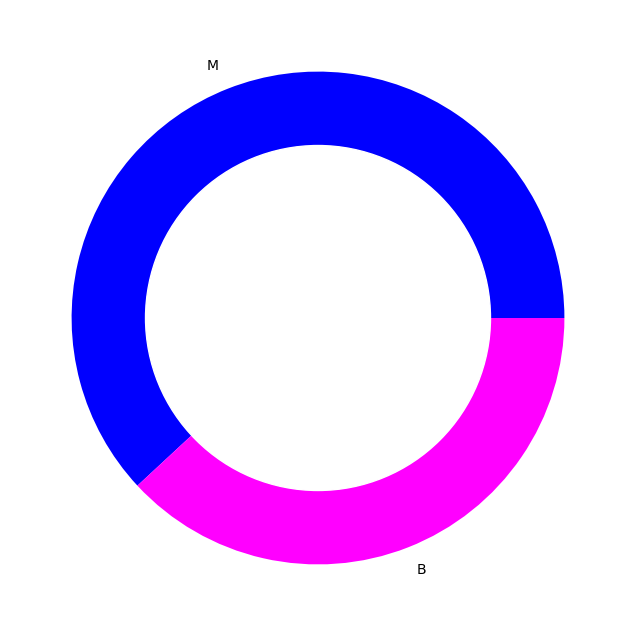

In [261]:
plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(df.diagnosis_result.value_counts(), labels=['M','B'], colors=['blue', 'magenta'])
p = plt.gcf()
p.gca().add_artist(circle)

In [262]:
# as there are 7 classes, so there will be 7 different dataframes
data_1 = df[df['diagnosis_result'] == 'M']
data_2 = df[df['diagnosis_result'] == 'B']

data_2

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
1,2,B,9.000000,13.000000,133.000000,1326.000000,0.143000,0.079000,0.181000,0.057000
5,6,B,25.000000,25.000000,83.000000,477.000000,0.128000,0.170000,0.209000,0.076000
12,13,B,14.000000,15.000000,132.000000,1123.000000,0.097000,0.246000,0.240000,0.078000
19,20,B,17.000000,11.000000,87.000000,566.000000,0.098000,0.081000,0.189000,0.058000
20,21,B,16.000000,14.000000,86.000000,520.000000,0.108000,0.127000,0.197000,0.068000
...,...,...,...,...,...,...,...,...,...,...
1090,91,B,27.814946,22.016473,89.773536,620.567400,0.085849,0.085527,0.176494,0.049894
1092,89,B,12.765434,9.237816,87.378195,434.022103,0.106142,0.110576,0.191955,0.068542
1096,64,B,26.542947,20.687847,61.789319,263.586983,0.058663,0.085398,0.239482,0.061407
1097,22,B,13.390673,23.714616,56.289257,282.984079,0.121289,0.055590,0.178655,0.074626


In [263]:
df.shape

(1100, 10)

In [264]:
1100 / 2

550.0

In [265]:
# applying resampling through sampling function in sklearn
from sklearn.utils import resample

# we will put 200 samples in each class
data_1_resample = resample(data_1, n_samples=550, 
                           random_state=123, replace=True)
data_2_resample = resample(data_2, n_samples=550, 
                           random_state=123, replace=True)



print(data_1)
print(data_2_resample)

df = pd.concat([data_1_resample, data_2_resample])


df

      id diagnosis_result     radius    texture   perimeter         area   
0      1                M  23.000000  12.000000  151.000000   954.000000  \
2      3                M  21.000000  27.000000  130.000000  1203.000000   
3      4                M  14.000000  16.000000   78.000000   386.000000   
4      5                M   9.000000  19.000000  135.000000  1297.000000   
6      7                M  16.000000  26.000000  120.000000  1040.000000   
...   ..              ...        ...        ...         ...          ...   
1091   3                M  24.300349  29.346594  133.070739  1179.779239   
1093   3                M  23.038802  23.374841  127.731373  1193.493438   
1094  11                M  24.626202  17.686887  110.409666   874.767463   
1095  34                M  15.457361  21.389945  126.360140  1081.089417   
1098  96                M  20.837509  20.246500  125.496669  1274.393825   

      smoothness  compactness  symmetry  fractal_dimension  
0       0.143000     0.278

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
816,28,M,19.647023,23.941686,126.457218,1119.534566,0.104947,0.107743,0.163878,0.047352
578,29,M,19.809501,14.230804,100.094179,747.747971,0.119515,0.162141,0.196530,0.069139
608,9,M,16.671865,25.512148,84.206613,522.819404,0.128299,0.203816,0.217389,0.079578
507,39,M,12.262248,19.428175,93.209250,745.682992,0.086833,0.069284,0.151073,0.053737
162,16,M,20.119273,22.217060,98.073206,613.397900,0.106133,0.174588,0.249980,0.071169
...,...,...,...,...,...,...,...,...,...,...
314,53,B,23.878855,15.939403,75.376268,507.921830,0.068028,0.058118,0.183576,0.060747
432,47,B,20.316494,8.143026,46.044024,288.599729,0.100700,0.059496,0.167086,0.055895
336,75,B,16.467278,9.716031,79.120468,391.220072,0.091974,0.059499,0.178982,0.056686
37,38,B,21.000000,11.000000,83.000000,524.000000,0.090000,0.038000,0.147000,0.059000


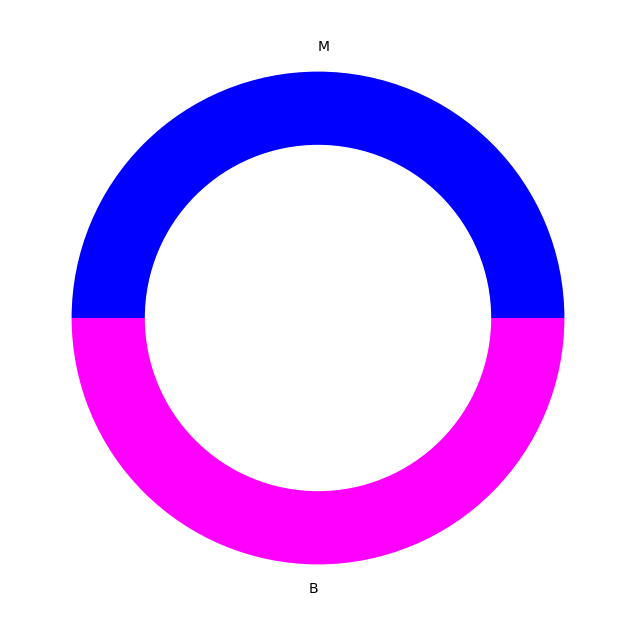

In [266]:
plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(df.diagnosis_result.value_counts(), labels=['M','B'], colors=['blue', 'magenta'])
p = plt.gcf()
p.gca().add_artist(circle)

In [267]:
df['diagnosis_result'] = df['diagnosis_result'].replace({'M': 1, 'B': 0})


                   diagnosis_result
id                        -0.307872
diagnosis_result           1.000000
radius                    -0.198641
texture                    0.186872
perimeter                  0.601379
area                       0.574178
smoothness                 0.220363
compactness                0.523615
symmetry                   0.131587
fractal_dimension          0.041901


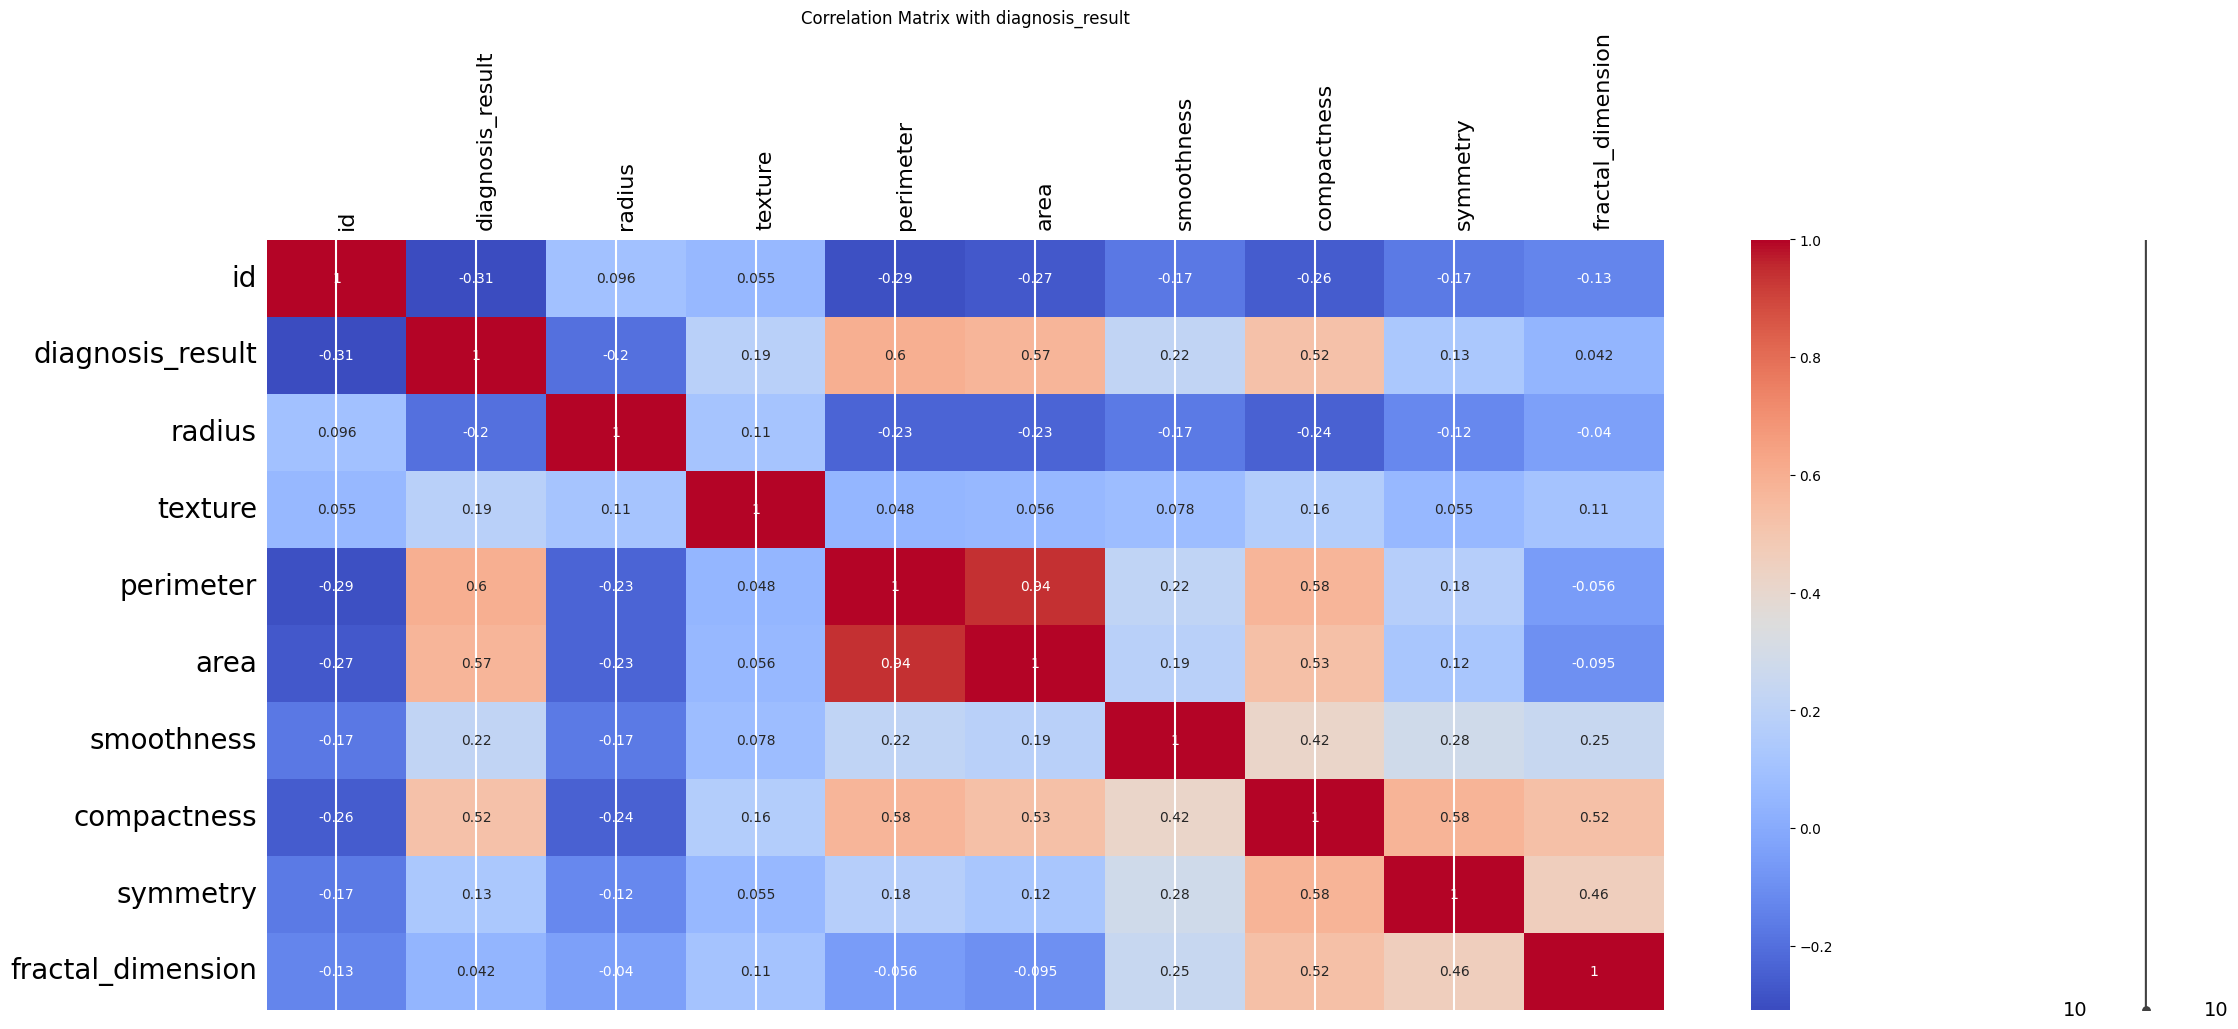

In [268]:
msno.matrix(df)

chosen_column = "diagnosis_result" 

# for col in augmented_dataset.columns:
#     if col != chosen_column:
#         plt.scatter(augmented_dataset[chosen_column], augmented_dataset[col])
#         plt.xlabel(chosen_column)
#         plt.ylabel(col)
#         plt.title(f"Scatter Plot of {col} vs. {chosen_column}")
#         plt.show()

corr_matrix = df.corr(method='pearson')

# display the correlations between each column and the chosen column
print(corr_matrix[[chosen_column]])   #The values range from -1 to 1, with values close to -1 indicating a strong negative correlation, values close to 1 indicating a strong positive correlation, and values close to 0 indicating little to no correlation. 

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title(f"Correlation Matrix with {chosen_column}")
plt.show()  #The color scale indicates the strength of the correlation, with red indicating a positive correlation and blue indicating a negative correlation. The darker the color, the stronger the correlation. The diagonal line in the heatmap represents the correlation of each variable with itself, which is always 1.

In [269]:
df.drop('compactness', axis=1, inplace=True)


In [270]:
# # checking for null, missing or NaN values
# augmented_dataset.isnull().sum().to_numpy()

In [271]:
# # cgecking for some outliers in dataset
# sns.catplot(y='', x='', data=augmented_dataset.sort_values("diagnosis_result", ascending=False),
#            kind='boxen', height=6, aspect=3)

In [272]:
# # cgecking for some outliers in dataset
# # sns.catplot(y='diagnosis_result', x='id', data=augmented_dataset.sort_values("diagnosis_result", ascending=False),
# #            kind='boxen', height=6, aspect=3)

# for col in augmented_dataset.columns:
#     sns.catplot(x = col, data = augmented_dataset)

In [273]:


# # Outliers are in following columns,
# ls = ["area", "perimeter", "smoothness", "symmetry", "fractal_dimension"]

# for i in ls:
# #     column_name = f'{i}'
#     print(augmented_dataset[i].mean())
#     print(augmented_dataset[i].std())
#     new_column_name = f'{i}_zscore'
#     augmented_dataset[new_column_name] = ( augmented_dataset[i] - augmented_dataset[i].mean() ) / augmented_dataset[i].std()
# augmented_dataset.head()

In [274]:
# ls2 = ["area_zscore", "perimeter_zscore", "smoothness_zscore", "symmetry_zscore", "fractal_dimension_zscore"]

# for i in ls2:
#     print(augmented_dataset[augmented_dataset[i]>3])

In [275]:
#  #data which have standard deviation high than 3 or lower -3 are always outliers. (sometimes it can be 2.3 or 2.5 also possible in place of 3, sometimes 4 is also possible, it depends on dataset)

# for i in ls2:
#     print(augmented_dataset[augmented_dataset[i]< -3])

In [276]:


# for i in ls2:
#     print(augmented_dataset[(augmented_dataset[i]<-3) | (augmented_dataset[i]>3)]) #This all are otliers

In [277]:
   
# df2 = augmented_dataset[(augmented_dataset.area_zscore>-3) & (augmented_dataset.area_zscore<3) & (augmented_dataset.perimeter_zscore>-3) & (augmented_dataset.perimeter_zscore<3) & (augmented_dataset.smoothness_zscore>-3) & (augmented_dataset.smoothness_zscore<3) & (augmented_dataset.symmetry_zscore>-3) & (augmented_dataset.symmetry_zscore<3) & (augmented_dataset.fractal_dimension_zscore>-3) & (augmented_dataset.fractal_dimension_zscore<3)]
# df2

In [278]:
# df2.shape

In [279]:
# augmented_dataset.shape[0] - df2.shape[0]

In [280]:
# # cgecking for some outliers in dataset
# # sns.catplot(y='diagnosis_result', x='id', data=augmented_dataset.sort_values("diagnosis_result", ascending=False),
# #            kind='boxen', height=6, aspect=3)

# for col in augmented_dataset.columns:
#     sns.catplot(x = col, data = augmented_dataset)

In [281]:
# del df2["area_zscore"]
# del df2["perimeter_zscore"]
# del df2["smoothness_zscore"]
# del df2["symmetry_zscore"]
# del df2["fractal_dimension_zscore"]

In [282]:
### Independent and Dependent features
X=df.iloc[:,2:]
y=df.iloc[:,1]

In [283]:
X.head()

,radius,texture,perimeter,area,smoothness,symmetry,fractal_dimension
816,19.647023,23.941686,126.457218,1119.534566,0.104947,0.163878,0.047352
578,19.809501,14.230804,100.094179,747.747971,0.119515,0.196530,0.069139
608,16.671865,25.512148,84.206613,522.819404,0.128299,0.217389,0.079578
507,12.262248,19.428175,93.209250,745.682992,0.086833,0.151073,0.053737
162,20.119273,22.217060,98.073206,613.397900,0.106133,0.249980,0.071169


In [284]:
y.head(20)

816     1
578     1
608     1
507     1
162     1
23      1
963     1
176     1
202     1
915     1
342     1
159     1
185     1
1028    1
70      1
115     1
874     1
355     1
182     1
663     1
Name: diagnosis_result, dtype: int64

In [285]:
### Train Test Split
from sklearn.model_selection import train_test_split

In [286]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [287]:
from sklearn.ensemble import RandomForestClassifier
ranfor=RandomForestClassifier()
ranfor.fit(X_train,y_train)

RandomForestClassifier()

In [288]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

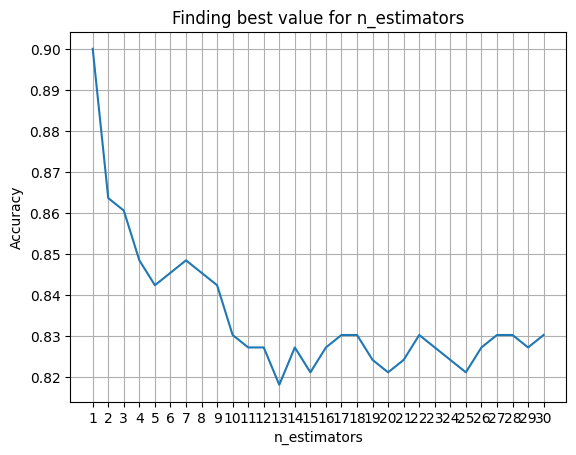

Highest value:  0.9


In [289]:
# Plotting a graph for n_neighbors 
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

X_axis = list(range(1, 31))
acc = pd.Series()
x = range(1,31)

for i in list(range(1, 31)):
    knn_model = KNeighborsClassifier(n_neighbors = i) 
    knn_model.fit(X_train, y_train)
    prediction = knn_model.predict(X_test)
    
    acc = pd.concat([acc, pd.Series(metrics.accuracy_score(prediction, y_test))])
plt.plot(X_axis, acc)
plt.xticks(x)
plt.title("Finding best value for n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
print('Highest value: ',acc.values.max())

In [290]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define parameter ranges
n_neighbors_range = range(5, 31)
metric_options = ['euclidean', 'manhattan']
weights_options = ['uniform', 'distance', 'inverse_distance']

# Create parameter grid
param_grid = dict(n_neighbors=n_neighbors_range, metric=metric_options, weights=weights_options)

# Create KNN model and grid search object
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, scoring='accuracy')

# Fit grid search to training data
grid_search.fit(X_train, y_train)

# Get best parameters and accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print('Best parameters:', best_params)
# print('Best accuracy:', best_accuracy)

Best parameters: {'metric': 'euclidean', 'n_neighbors': 20, 'weights': 'distance'}


C:\Users\Meet Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
260 fits failed out of a total of 780.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
260 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Meet Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Meet Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "C:\Users\Meet Patel\AppData\Local\Programs\Python\Python311\Lib\site-p

In [291]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean', weights='distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1, weights='distance')

In [292]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [293]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [294]:
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [295]:
Y_pred_logreg = logreg.predict(X_test)
Y_pred_knn = knn.predict(X_test)
Y_pred_svc = svc.predict(X_test)
Y_pred_nb = nb.predict(X_test)
Y_pred_dectree = dectree.predict(X_test)
Y_pred_ranfor = ranfor.predict(X_test)

In [296]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(y_test, Y_pred_logreg)
accuracy_knn = accuracy_score(y_test, Y_pred_knn)
accuracy_svc = accuracy_score(y_test, Y_pred_svc)
accuracy_nb = accuracy_score(y_test, Y_pred_nb)
accuracy_dectree = accuracy_score(y_test, Y_pred_dectree)
accuracy_ranfor = accuracy_score(y_test, Y_pred_ranfor)

In [297]:
### Check Accuracy
from sklearn.metrics import accuracy_score
# Accuracy on test set
print("Logistic Regression: " + str(accuracy_logreg * 100))
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Naive Bayes: " + str(accuracy_nb * 100))
print("Decision tree: " + str(accuracy_dectree * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))

Logistic Regression: 81.81818181818183
K Nearest neighbors: 90.0
Support Vector Classifier: 80.9090909090909
Naive Bayes: 81.51515151515152
Decision tree: 91.21212121212122
Random Forest: 93.03030303030303


In [299]:
from sklearn.model_selection import cross_val_score
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

# CatBoost model
catboost_model = CatBoostRegressor()
catboost_model.fit(X_train, y_train)
predictions_catboost = catboost_model.predict(X_test)





# Set the number of folds
n_folds = 5

# Initialize the KFold object
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Initialize a list to store the scores
r2_scores = []
scores = []
# Perform k-fold cross-validation
for train_index, test_index in kf.split(X):
    # Split the data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the CatBoost model on the training set
    catboost_model.fit(X_train, y_train)
    
    # Make predictions on the test set
    predictions = catboost_model.predict(X_test)
    
    # Calculate the R-squared score
    r2 = r2_score(y_test, predictions)
    r2_scores.append(r2)

    score = mean_squared_error(y_test, predictions)
    scores.append(score)

# Calculate the mean R-squared score
mean_r2 = sum(r2_scores) / n_folds * 100

print(f"Mean R-squared: {mean_r2:.2f}%")

# Calculate the mean and standard deviation of the scores
mean_score = sum(scores) / n_folds
std_dev = (sum((score - mean_score)**2 for score in scores) / (n_folds - 1))**0.5
print(f"Mean squared error: {mean_score:.2f} +/- {std_dev:.2f}")

Learning rate set to 0.040124
0:	learn: 0.4890259	total: 2.69ms	remaining: 2.69s
1:	learn: 0.4795222	total: 6.18ms	remaining: 3.09s
2:	learn: 0.4692994	total: 8.46ms	remaining: 2.81s
3:	learn: 0.4600058	total: 11.8ms	remaining: 2.94s
4:	learn: 0.4521552	total: 14.1ms	remaining: 2.8s
5:	learn: 0.4445113	total: 16.7ms	remaining: 2.77s
6:	learn: 0.4367739	total: 19.5ms	remaining: 2.76s
7:	learn: 0.4285768	total: 21.9ms	remaining: 2.72s
8:	learn: 0.4218798	total: 25.1ms	remaining: 2.76s
9:	learn: 0.4146569	total: 26.6ms	remaining: 2.63s
10:	learn: 0.4078584	total: 28.3ms	remaining: 2.55s
11:	learn: 0.4012445	total: 29.8ms	remaining: 2.45s
12:	learn: 0.3951062	total: 31.1ms	remaining: 2.36s
13:	learn: 0.3897130	total: 32.6ms	remaining: 2.29s
14:	learn: 0.3844199	total: 34.2ms	remaining: 2.24s
15:	learn: 0.3800603	total: 37.7ms	remaining: 2.32s
16:	learn: 0.3745639	total: 39.1ms	remaining: 2.26s
17:	learn: 0.3698438	total: 40.5ms	remaining: 2.21s
18:	learn: 0.3646209	total: 42ms	remaining: 2

In [300]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Set the number of folds
n_folds = 5

# Initialize a list to store the accuracy scores
accuracy_scores = []

# Define your Neural Network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Perform k-fold cross-validation
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the Neural Network model on the training set
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)
    
    # Evaluate the model on the test set
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)
    accuracy_scores.append(accuracy)

# Calculate the mean accuracy score
mean_accuracy = sum(accuracy_scores) / n_folds * 100

print(f"Neural Network: {mean_accuracy:.2f}%")

Neural Network: 69.36%


In [228]:
ls = [accuracy_logreg* 100, accuracy_knn* 100, accuracy_svc* 100, accuracy_nb* 100, accuracy_dectree* 100, accuracy_ranfor* 100]
ls_model_names = ["accuracy_logreg", "accuracy_knn", "accuracy_svc", "accuracy_nb", "accuracy_dectree", "accuracy_ranfor"]
ls_model = [logreg, knn, svc, nb, dectree, ranfor]

Max_accuracy = max(ls)
Max_accuracy_indexes = []
Var_names = []

for i in range(len(ls)):
    if Max_accuracy == ls[i]:
        Max_accuracy_indexes.append(i)

for i in Max_accuracy_indexes:
    print("Highesst accuracy: ", ls[i], "; model: ", ls_model[i])

Highesst accuracy:  100.0 ; model:  KNeighborsClassifier(metric='euclidean', n_neighbors=1, weights='distance')
Highesst accuracy:  100.0 ; model:  DecisionTreeClassifier(criterion='entropy', random_state=42)
Highesst accuracy:  100.0 ; model:  RandomForestClassifier()


In [229]:
from sklearn.metrics import confusion_matrix
y_pred = BestFitModelName.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[178,   0],
       [  0, 152]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

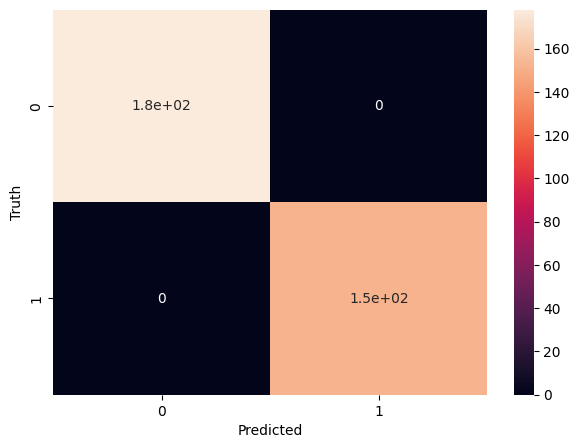

In [230]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [231]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       178
           1       1.00      1.00      1.00       152

    accuracy                           1.00       330
   macro avg       1.00      1.00      1.00       330
weighted avg       1.00      1.00      1.00       330



In [100]:
#Creating a pickle file for making an API

pickle_out = open("Prostate_Cancer.pkl","wb")
pickle.dump(BestFitModelName, pickle_out)
pickle_out.close()